In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Import data dari CSV
data = pd.read_csv('dataset_covid.csv')
data.head()

,Dirawat,Sembuh,Meninggal,Zona
0,606,8958,303,Orange
1,119,1438,30,Orange
2,62,1519,4,Orange
3,56,530,3,Orange
4,45,597,8,Orange


In [13]:
# Konversi value 'zona' kedalam bentuk angka
data.loc[data['Zona'] == 'Orange', 'Zona'] = 0
data.loc[data['Zona'] == 'Kuning', 'Zona'] = 1

data = data.apply(pd.to_numeric, errors='coerce')
data.head()

,Dirawat,Sembuh,Meninggal,Zona
0,606,8958,303,0
1,119,1438,30,0
2,62,1519,4,0
3,56,530,3,0
4,45,597,8,0


In [14]:
x = data.drop(["Zona"], axis=1)
x.head()

,Dirawat,Sembuh,Meninggal
0,606,8958,303
1,119,1438,30
2,62,1519,4
3,56,530,3
4,45,597,8


In [15]:
y = data["Zona"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Zona, dtype: int64

In [16]:
# Pisahkan atribut untuk training & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 0)

In [17]:
# Membuat model Naive Bayes terhadap Training set
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [18]:
y_predict = model.predict(x_test)
print("Prediksi Naive Bayes : ",y_predict)

Prediksi Naive Bayes :  [0 0 0 0 1 0 0 1 1 0]


In [19]:
# Menghitung tingkat akurasi
accuracy_score(y_test, y_predict)*100

70.0

In [20]:
# Menghitung nilai akurasi dari klasifikasi naive bayes 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



In [21]:
model.predict_proba(x_test)

array([[9.02145887e-01, 9.78541135e-02],
       [9.29724785e-01, 7.02752146e-02],
       [9.99986173e-01, 1.38272555e-05],
       [5.82314581e-01, 4.17685419e-01],
       [1.19241861e-03, 9.98807581e-01],
       [1.00000000e+00, 0.00000000e+00],
       [8.57325162e-01, 1.42674838e-01],
       [2.31590698e-01, 7.68409302e-01],
       [4.90966583e-02, 9.50903342e-01],
       [9.99999802e-01, 1.98472700e-07]])

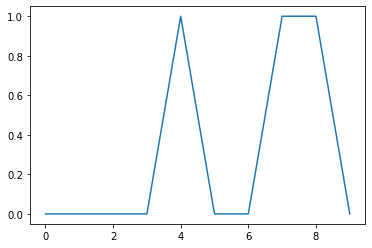

In [28]:
plt.plot(y_predict)
plt.show()